## IMPORTING ESSENTIAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import logging
warnings.filterwarnings('ignore')

## DEFINING LOG FILE

In [2]:
logging.basicConfig(filename='traininglog.log', level=logging.INFO,
                    format='%(levelname)s:%(asctime)s:%(message)s')
logger = logging.getLogger(__name__)

## LOADING DATASET

In [3]:
logger.info('Loading dataset')
df=pd.read_csv(r'C:\Users\tyagi\desktop\official\study\data science\internship\internship dataset\UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## ANALYZING, REPLACING AND RENAMING FOR BETTER CONVENIENCE

In [4]:
logger.info('Analyzing data...')
df["defaulter"]=df["default.payment.next.month"]
df.drop('default.payment.next.month',axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<AxesSubplot:xlabel='defaulter', ylabel='count'>

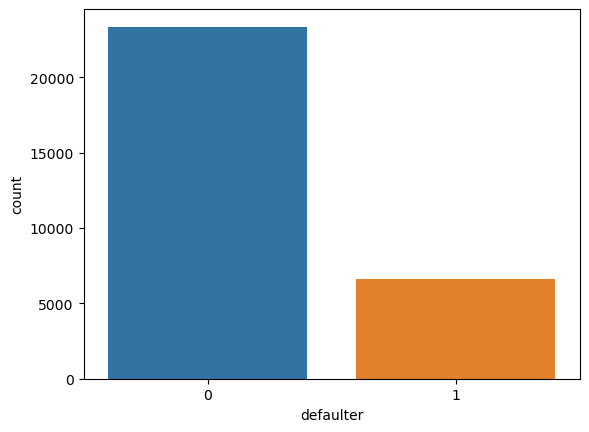

In [5]:
sns.countplot(x='defaulter',data=df)

In [6]:
fil=(df['EDUCATION']==5) | (df['EDUCATION']==6) | (df['EDUCATION']==0)
df.loc[fil,'EDUCATION']=4
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [7]:
fil=(df["MARRIAGE"]==0)
df.loc[fil,'MARRIAGE']=3
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [8]:
categorical_features=['SEX','EDUCATION','MARRIAGE']
df_cat=df[categorical_features]
df_cat["defaulter"]=df["defaulter"]

In [9]:
df_cat.replace({'SEX':{1:'male',2:'female'},'EDUCATION':{1:'graduate school',2:'university',3:'high school',4:'others'},'MARRIAGE':{1:'married',2:'single',3:'others'}},inplace=True)

In [10]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

<Figure size 1000x500 with 0 Axes>

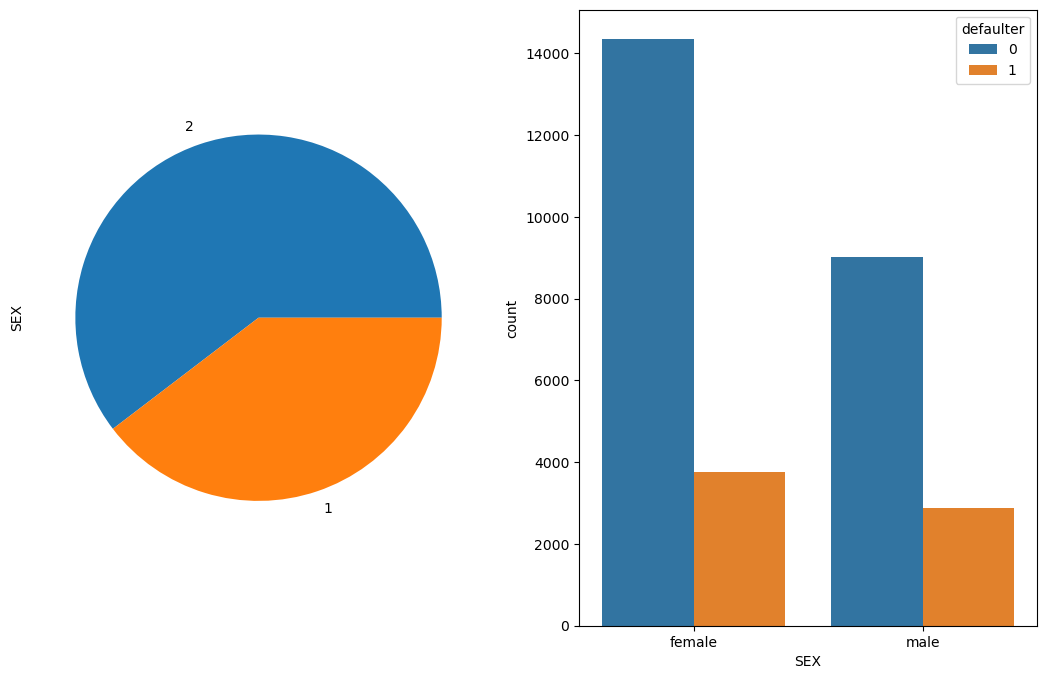

<Figure size 1000x500 with 0 Axes>

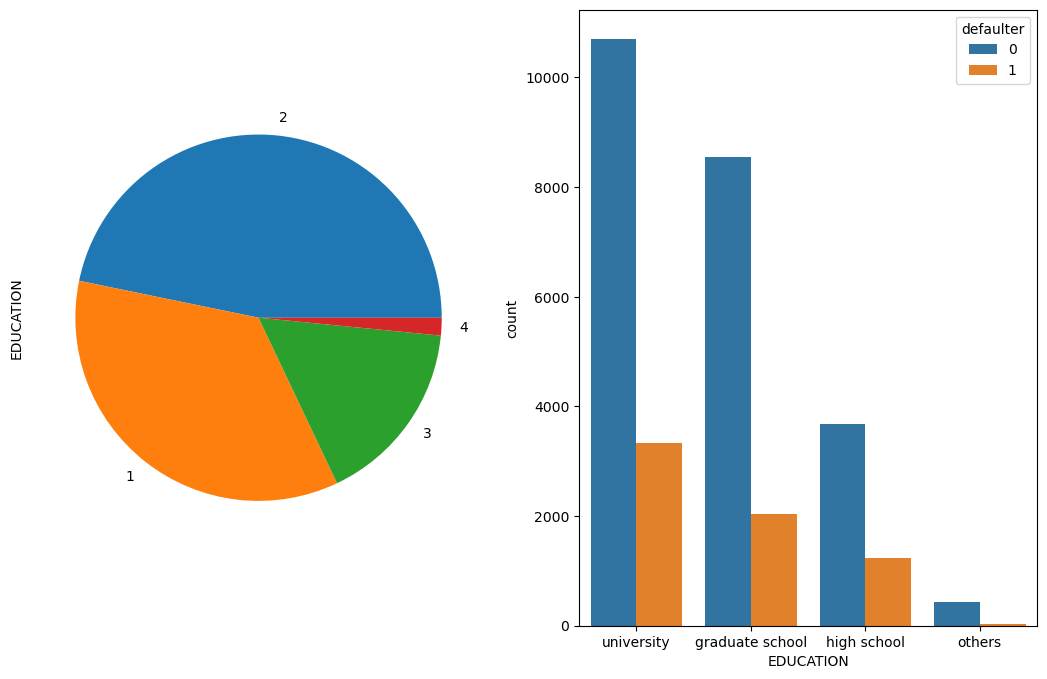

<Figure size 1000x500 with 0 Axes>

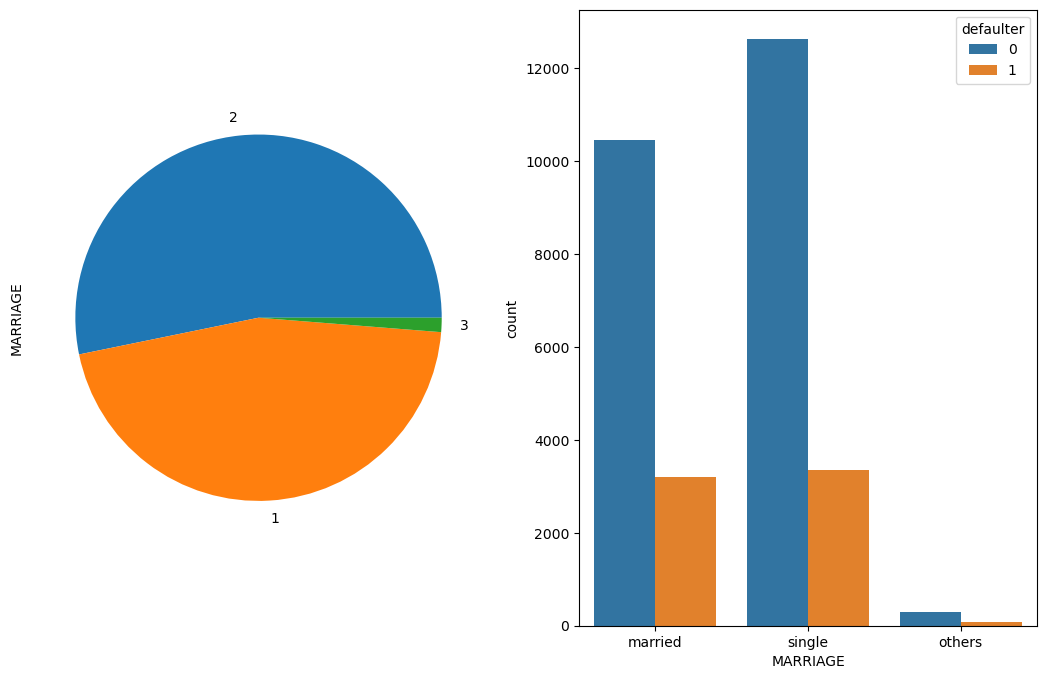

In [11]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig,axes=plt.subplots(ncols=2,figsize=(13,8))
    df[col].value_counts().plot(kind="pie",ax=axes[0],subplots=True)
    sns.countplot(x=col,hue="defaulter",data=df_cat)

In [12]:
df=df.drop('default.payment.next.month',axis=1)

## OVER SAMPLING FOR UNBIASED DATA

In [13]:
logger.info('Oversampling data...')
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(df.iloc[:,0:-1],df['defaulter'])

In [14]:
columns=list(df.columns)
balance_df=pd.DataFrame(x_smote,columns=columns)
balance_df["defaulter"]=y_smote

In [15]:
df_fr=balance_df.copy()

In [16]:
df_fr.drop('ID',axis = 1, inplace = True)

In [17]:
df_fr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
x=df_fr.drop('defaulter',axis=1)
y=df_fr['defaulter'].copy()

## SPLITTING DATA

In [19]:
logger.info('Splitting data...')
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42
                                          ,stratify=y)
xtrain.to_csv('traindata.csv')
xtest.to_csv('testdata.csv')

## SCALING DATA

In [20]:
logger.info('Scaling data...')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain1=scaler.fit_transform(xtrain)
xtest1=scaler.transform(xtest)

## USING LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
logger.info('Starting training of logistic regression')
reg=LogisticRegression()
modelreg=reg.fit(xtrain1,ytrain)
regpred=modelreg.predict(xtest1)

Logistic Regression model accuracy(in %): 72.24481061416648


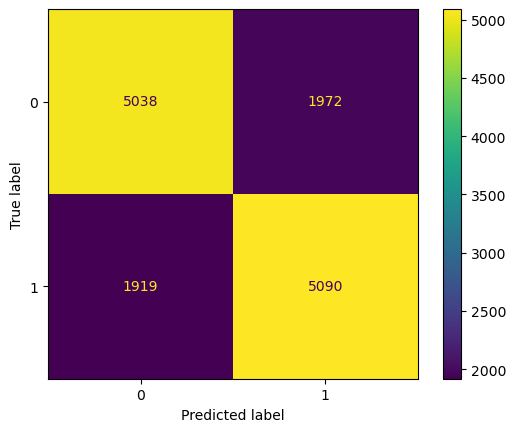

In [22]:
from sklearn.metrics import accuracy_score
accuracyreg=accuracy_score(ytest, regpred)*100
print("Logistic Regression model accuracy(in %):"
      ,accuracyreg)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
treecon=confusion_matrix(ytest,regpred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracyreg:.4f}')

## USING RANDOM FOREST CLASSIFIER

In [23]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(criterion= 'entropy', max_depth= 9, max_features= 6, n_estimators= 200)
logger.info('Starting training of random forest classifier')
modelop=rnd.fit(xtrain1,ytrain)
rndpred=modelop.predict(xtest1)

In [24]:
trainrndpred=rnd.predict(xtrain1)
print("Random Forest model Test accuracy(in %):"
      ,accuracy_score(ytest, rndpred)*100)
print("Random Forest model Train accuracy(in%):",accuracy_score(ytrain,trainrndpred)*100)

Random Forest model Test accuracy(in %): 77.88715314929739
Random Forest model Train accuracy(in%): 80.43657708887461


In [38]:
ypred=modelop.predict(xtest)

In [41]:
from collections import Counter
print(Counter(ypred))
print(Counter(ytest))

Counter({0: 10580, 1: 3439})
Counter({0: 7010, 1: 7009})


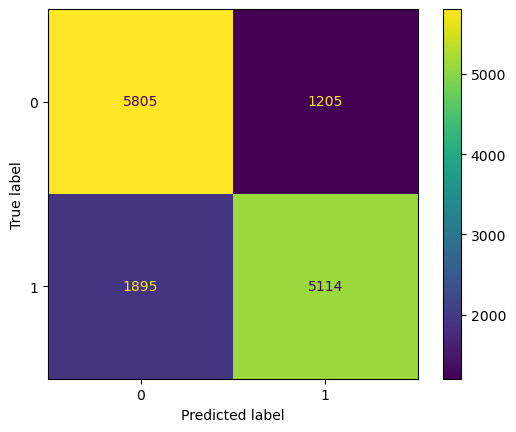

In [25]:
treecon=confusion_matrix(ytest,rndpred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
accuracyrnd=accuracy_score(ytest, rndpred)*100
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracyrnd:.4f}')

### FINDING BEST PARAMETERS FOR RANDOM FOREST

In [26]:
#from sklearn.metrics import classification_report

#from time import time

#time_start=time()

#from sklearn.model_selection import GridSearchCV

#rfc_model = RandomForestClassifier(random_state = 7, class_weight='balanced', n_jobs=-1)
#params={"n_estimators":[150,200],
        #"max_features": [6,7],
        #'max_depth': [8,9],
       #"criterion":['entropy']}
#rfc_classifier = GridSearchCV(estimator = rfc_model, param_grid = params, scoring = "recall_weighted")
#rfc_classifier.fit(xtrain,ytrain)
#rfc_predict = rfc_classifier.predict(xtest)
#print(rfc_classifier.best_params_)
#print(classification_report(ytest, rfc_predict))

#time_end=time()
#print("Runtime  = ",time_end-time_start)

## USING SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc=SVC()
logger.info('Starting training of SVM')
svc.fit(xtrain1,ytrain)
svcpred=svc.predict(xtest1)

In [29]:
print("SVM(in %):"
      ,accuracy_score(ytest, svcpred)*100)

SVM(in %): 76.43911833939653


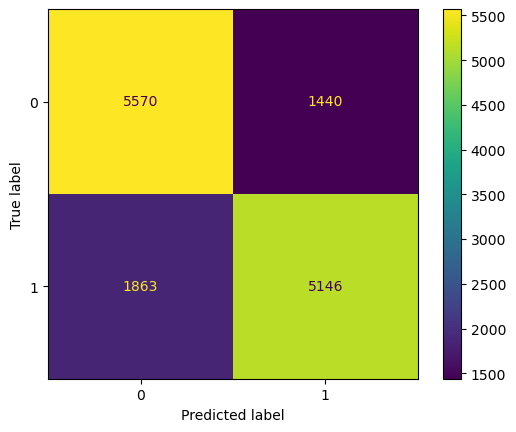

In [30]:
treecon=confusion_matrix(ytest,svcpred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
accuracysvc=accuracy_score(ytest, svcpred)*100
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracysvc:.4f}')

## USING KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

### FINDING BEST HYPERPARAMETERS FOR KNN

In [32]:
#knn = KNeighborsClassifier()
#from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
#grid_search=grid.fit(xtrain, ytrain)

In [33]:
#print(grid_search.best_params_)

In [34]:
#accuracy = grid_search.best_score_ *100
#print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
logger.info('Starting training of KNN')
knn.fit(xtrain1, ytrain)

y_test_hat=knn.predict(xtest1) 

test_accuracy=accuracy_score(ytest,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 75.40%


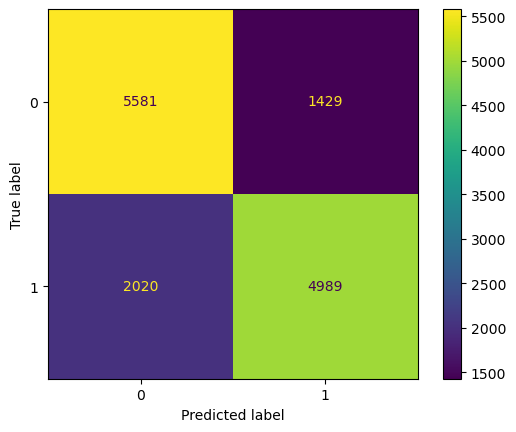

In [36]:
treecon=confusion_matrix(ytest,y_test_hat)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()
accuracyknn=accuracy_score(ytest, y_test_hat)*100
tn, fp, fn, tp = treecon.ravel()
 
# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
    
logger.info(f'Finished training: precision {precision:.4f}, recall {recall:.4f}, f1 score {f1_score:.4f}, accuracy {accuracyknn:.4f}')

## SAVING THE BEST MODEL AS PKL FILE

In [37]:
logger.info('Saving best model')
file=open('randomforestclassifiermodel.pkl','wb')
pickle.dump(modelop,file)